<a href="https://colab.research.google.com/github/sergey031/DZ_MLP/blob/master/03_hw_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Практическая работа 3. Линейная регрессия.

> Линейная регрессия - это не повод для затяжной депрессии.

1. Скачайте этот ноутбук к себе.
2. Заполните пропущенные ячейки, отвечая на заданные вопросы. Там должен быть код! (если не сказано обратное)
3. Сохраните результат в своём гитхаб репозитории.

### Полезная литература

- [Первый конспект лекции про линейную регрессию из курса ФШЭ](https://github.com/esokolov/ml-course-hse/blob/master/2016-fall/lecture-notes/lecture02-linregr.pdf)
- [Второй конспект лекции про линейную регрессию из курса ФШЭ](https://github.com/esokolov/ml-course-hse/blob/master/2016-fall/lecture-notes/lecture03-linregr.pdf)
- [Теория из курса ODS](https://github.com/Yorko/mlcourse_open/blob/master/jupyter_notebooks/topic04_linear_models/topic4_linear_models_part1_mse_likelihood_bias_variance.ipynb)
- [Материалы из курса от МФТИ](https://www.coursera.org/specializations/machine-learning-data-analysis)
- [Статья про лин.рег. от ODS на habrahabr](https://habrahabr.ru/company/ods/blog/323890/)

## Данные

Возьмем датасет о стоимости домов: https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data.

```
SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.
MSSubClass: The building class
MSZoning: The general zoning classification
LotFrontage: Linear feet of street connected to property
LotArea: Lot size in square feet
Street: Type of road access
Alley: Type of alley access
LotShape: General shape of property
LandContour: Flatness of the property
Utilities: Type of utilities available
LotConfig: Lot configuration
LandSlope: Slope of property
Neighborhood: Physical locations within Ames city limits
Condition1: Proximity to main road or railroad
Condition2: Proximity to main road or railroad (if a second is present)
BldgType: Type of dwelling
HouseStyle: Style of dwelling
OverallQual: Overall material and finish quality
OverallCond: Overall condition rating
YearBuilt: Original construction date
YearRemodAdd: Remodel date
RoofStyle: Type of roof
RoofMatl: Roof material
Exterior1st: Exterior covering on house
Exterior2nd: Exterior covering on house (if more than one material)
MasVnrType: Masonry veneer type
MasVnrArea: Masonry veneer area in square feet
ExterQual: Exterior material quality
ExterCond: Present condition of the material on the exterior
Foundation: Type of foundation
BsmtQual: Height of the basement
BsmtCond: General condition of the basement
BsmtExposure: Walkout or garden level basement walls
BsmtFinType1: Quality of basement finished area
BsmtFinSF1: Type 1 finished square feet
BsmtFinType2: Quality of second finished area (if present)
BsmtFinSF2: Type 2 finished square feet
BsmtUnfSF: Unfinished square feet of basement area
TotalBsmtSF: Total square feet of basement area
Heating: Type of heating
HeatingQC: Heating quality and condition
CentralAir: Central air conditioning
Electrical: Electrical system
1stFlrSF: First Floor square feet
2ndFlrSF: Second floor square feet
LowQualFinSF: Low quality finished square feet (all floors)
GrLivArea: Above grade (ground) living area square feet
BsmtFullBath: Basement full bathrooms
BsmtHalfBath: Basement half bathrooms
FullBath: Full bathrooms above grade
HalfBath: Half baths above grade
Bedroom: Number of bedrooms above basement level
Kitchen: Number of kitchens
KitchenQual: Kitchen quality
TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
Functional: Home functionality rating
Fireplaces: Number of fireplaces
FireplaceQu: Fireplace quality
GarageType: Garage location
GarageYrBlt: Year garage was built
GarageFinish: Interior finish of the garage
GarageCars: Size of garage in car capacity
GarageArea: Size of garage in square feet
GarageQual: Garage quality
GarageCond: Garage condition
PavedDrive: Paved driveway
WoodDeckSF: Wood deck area in square feet
OpenPorchSF: Open porch area in square feet
EnclosedPorch: Enclosed porch area in square feet
3SsnPorch: Three season porch area in square feet
ScreenPorch: Screen porch area in square feet
PoolArea: Pool area in square feet
PoolQC: Pool quality
Fence: Fence quality
MiscFeature: Miscellaneous feature not covered in other categories
MiscVal: $Value of miscellaneous feature
MoSold: Month Sold
YrSold: Year Sold
SaleType: Type of sale
SaleCondition: Condition of sale
```

Целевой переменной будет `SalePrice`. То есть мы будем предсказывать стоимость жилья на основе его характеристик. Это задание будет не то чтобы про линейную регрессию, но про попытку построить модель для предсказания цен на дом. В принципе я бы мог еще добавить заданий на более тщательный отбор признаков, логарифмирование признаков, у которых сильное смещение "скоса"(skew). Можно было бы анализировать и выпрямлять распределение целевой переменной. Можно было бы генерировать новые признаки из существующих, строить ансамбли моделей. Но мы ограничимся, пока что.......

In [ ]:
df = pd.read_csv('house_price.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
df = pd.read_csv('house_price.csv')
df.shape == (1460, 80)


False

In [ ]:
df = pd.read_csv('house_price.csv')
df.columns

## 1.0 Анализ целевого признака (3 балла)

Удостоверимся, что раcпределение целевого признака "хорошее", без странных выбросов. В идеале мы хотим видеть нормальное распределени или достаточно похожее на него, без очень длинных "хвостов" выбросов.

_Почему требуется нормальность распределения: ищите объяснения линейной регресси через алгоритмы максимизации правдоподобия. В итоге, грубо говоря, суть сводится к тому, что с ростом объема выборки, оценка максимального правдоподобия лучше описывает нормальное распределение._

[Коэффициент эксцесса](http://www.machinelearning.ru/wiki/index.php?title=%D0%9A%D0%BE%D1%8D%D1%84%D1%84%D0%B8%D1%86%D0%B8%D0%B5%D0%BD%D1%82_%D1%8D%D0%BA%D1%81%D1%86%D0%B5%D1%81%D1%81%D0%B0) показывает степень остроты пика распределения случайной величины. Для нормального распределения он равен `0`. Если хвосты распределения «тяжелее», а пик более «приплюснутый», чем у нормального распределения, то коэффициент < 0. А если хвосты легкие, то больше 0. В нашем случае должно получиться околов `6.5`.

Задание:
- Нарисуйте график распределения `SalePrice`, используйте аргумент `fit=scipy.stats.norm`, чтобы нарисовать предполагаемое нормальное распределение. Напечатайте значение коэффициент эксцесса `kurtosis` для этого признака.
- Нарисуйте график [scipy.stats.probplot](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.probplot.html) - он покажет нам реальные квантили выборки и теоретические. По нему можно видеть, на сколько много выьросов и на сколько выборка предсказуема.
- Что вы можете сказать по поводу выборки основываясь на `probplot`.  [wiki](https://en.wikipedia.org/wiki/Normal_probability_plot)

<ipython-input-19-02861a4cbde9>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['SalePrice'], fit=stats.norm)


Text(0, 0.5, 'Плотность')

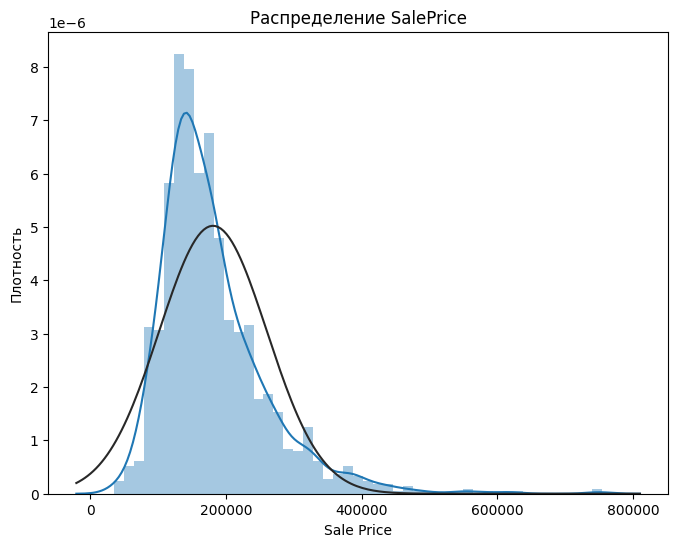

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats

df = pd.read_csv('house_price.csv')

plt.figure(figsize=(8, 6))
sns.distplot(df['SalePrice'], fit=stats.norm)
plt.title('Распределение SalePrice')
plt.xlabel('Sale Price')
plt.ylabel('Плотность')


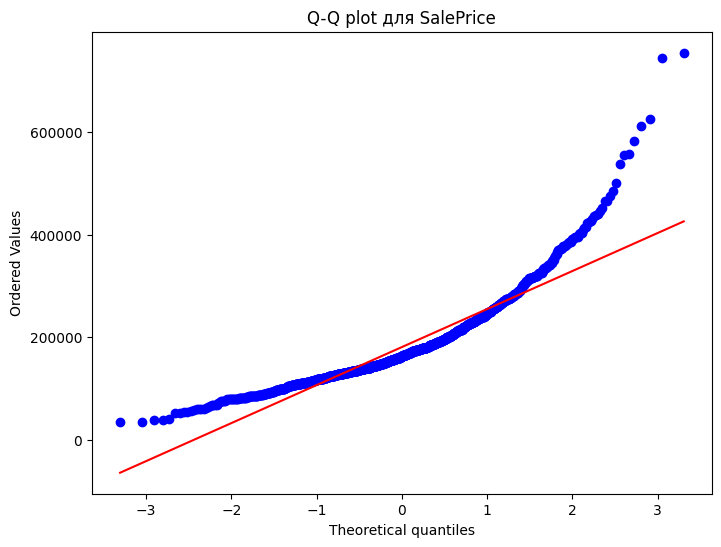

In [ ]:
plt.figure(figsize=(8, 6))
stats.probplot(df['SalePrice'], plot=plt)
plt.title('Q-Q plot для SalePrice')
plt.show()


## 1.2 Анализ некоторых зависимостей (3 балла)

У нас очень много разных признаков. Любопытно построить разные графики. Позаботьтесь о красоте и наглядности графиков, сделайте так, чтобы они были большими и их можно было прочесть. Даже подписи на графиках должны быть читаемые!!

Задания: Постройте графики, отражающие зависимости этих признаков:
- дата постройки дома и его стоимости
- "качество дома и материалов" и его стоимости
- площадь дома и стоимость

Hints: Вспомните про boxplot, jointplot, lmplot...

Text(0, 0.5, 'Стоимость')

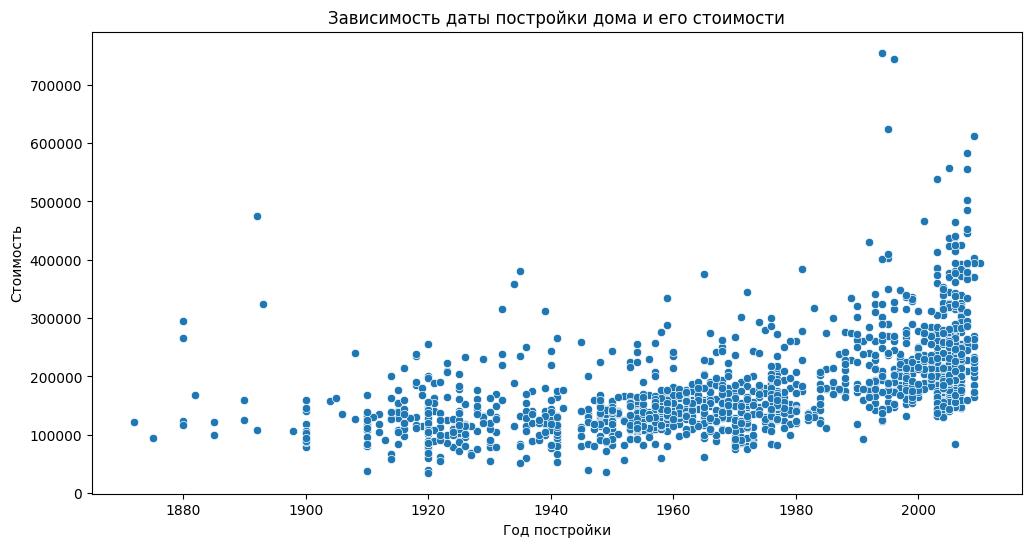

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

df = pd.read_csv('house_price.csv')

plt.figure(figsize=(12, 6))
sns.scatterplot(x='YearBuilt', y='SalePrice', data=df)
plt.title('Зависимость даты постройки дома и его стоимости')
plt.xlabel('Год постройки')
plt.ylabel('Стоимость')


Text(0, 0.5, 'Стоимость')

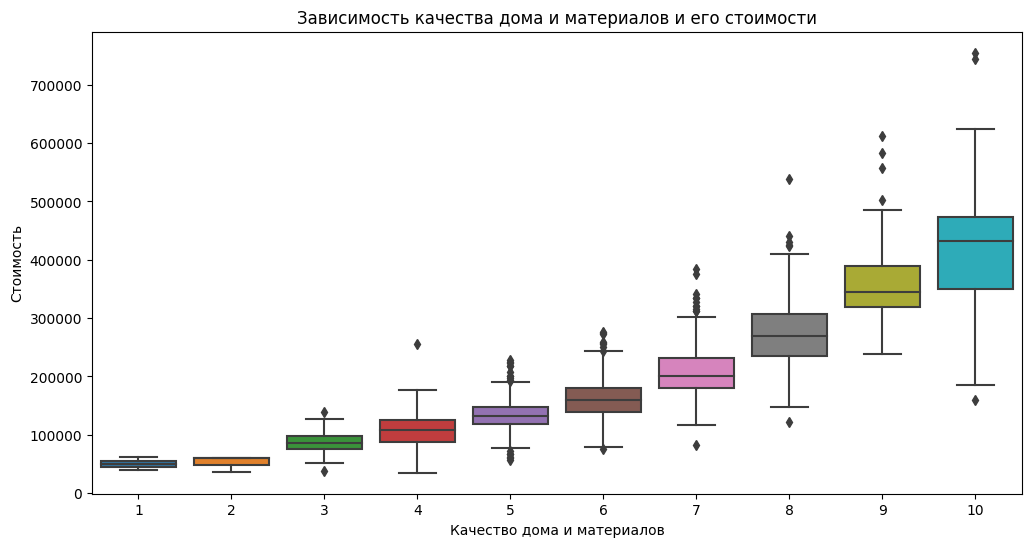

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='OverallQual', y='SalePrice', data=df)
plt.title('Зависимость качества дома и материалов и его стоимости')
plt.xlabel('Качество дома и материалов')
plt.ylabel('Стоимость')


Text(0, 0.5, 'Стоимость')

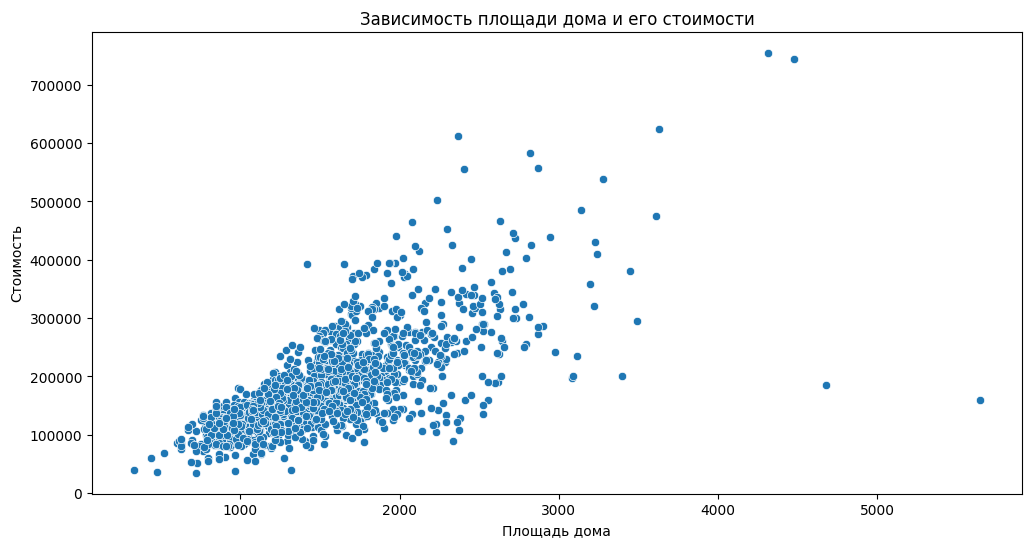

In [ ]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='GrLivArea', y='SalePrice', data=df)
plt.title('Зависимость площади дома и его стоимости')
plt.xlabel('Площадь дома')
plt.ylabel('Стоимость')


## 1.2 Heatmap (3 балла)

Судя по предыдущим графикам, есть некоторые линейные зависимости. Но строить по графику на каждый признак из 80 штук немного долго и не наглядно. Постройте красивый график корреляции всех признаков. Используйте цвета `RdYlGn`, так будет нагляднее. Не забудьте применить маску, чтобы убрать дублирующую половину матрицы.

<ipython-input-25-0148349451a6>:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


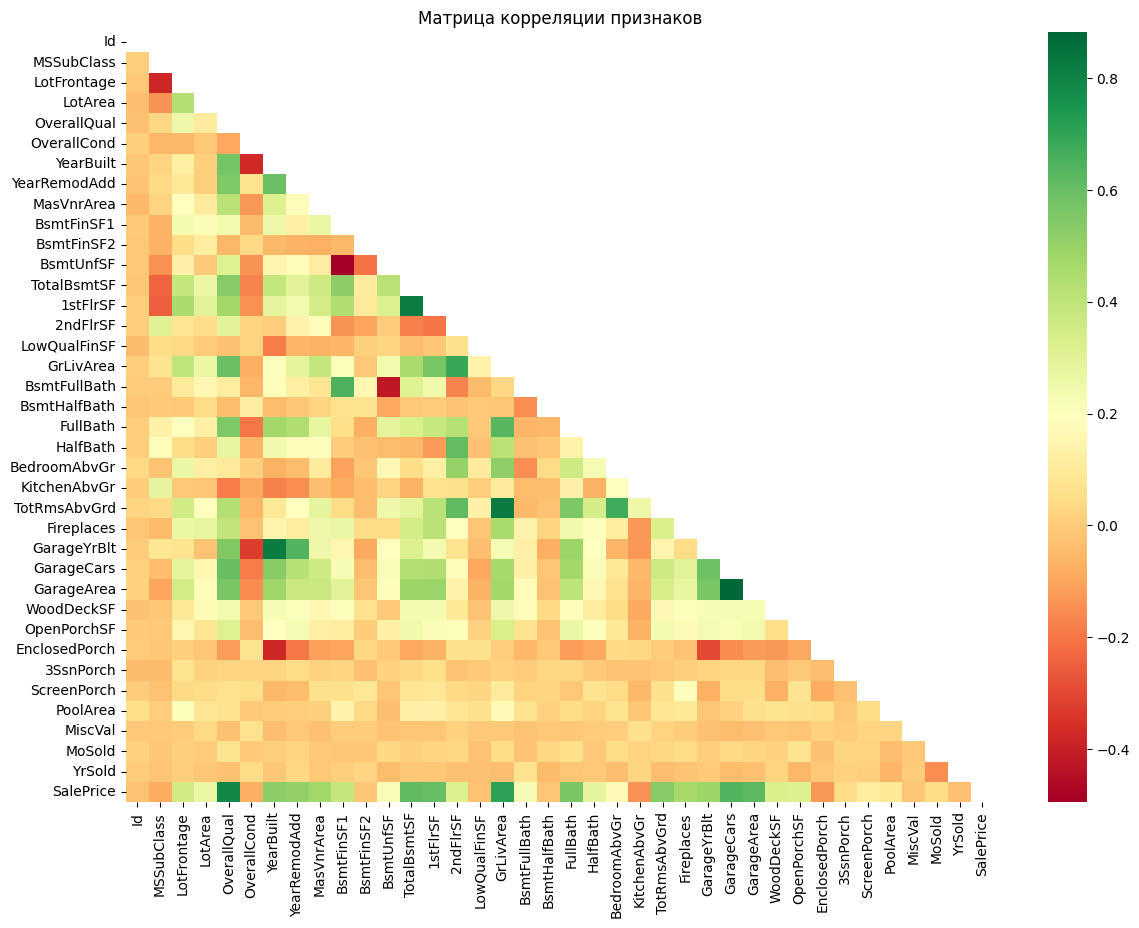

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('house_price.csv')

correlation_matrix = df.corr()

mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='RdYlGn', mask=mask)
plt.title('Матрица корреляции признаков')
plt.show()


Большая матрица 38x38 ячеек. И мы видим, там есть сильно коррелируемые объекты с нашей целевой переменной.

- Нарисуйте крупно heatmap этих сильно коррелируемых объектов( больше 0.5 по абсолютному значению) и сделайте так, чтобы в каждой ячейке было значение корреляции.
- Выведите список этих сильно коррелируемых признаков.
- Желательно сделать heatmap диагональной матрицей, чтобы было красиво (в теории был пример)

Запомним эти признаки!

<ipython-input-26-290282127acc>:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()
/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


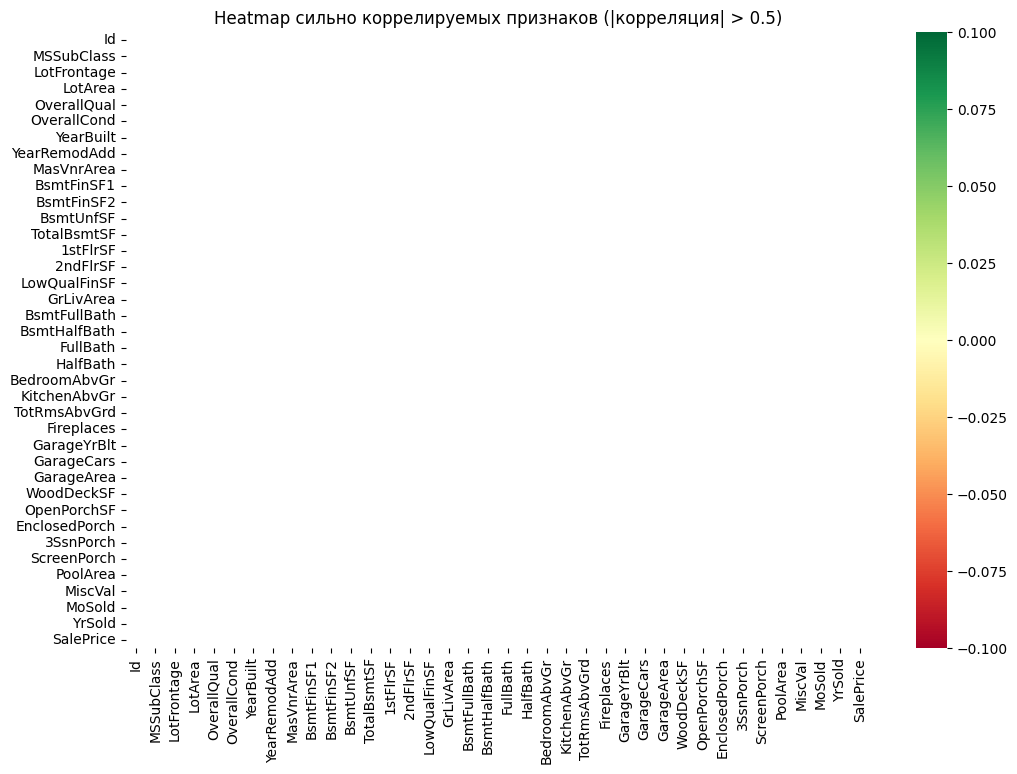

Сильно коррелирующие признаки и их коэффициенты корреляции:
OverallQual - YearBuilt: 0.57
OverallQual - YearRemodAdd: 0.55
OverallQual - TotalBsmtSF: 0.54
OverallQual - GrLivArea: 0.59
OverallQual - FullBath: 0.55
OverallQual - GarageYrBlt: 0.55
OverallQual - GarageCars: 0.60
OverallQual - GarageArea: 0.56
OverallQual - SalePrice: 0.79
YearBuilt - OverallQual: 0.57
YearBuilt - YearRemodAdd: 0.59
YearBuilt - GarageYrBlt: 0.83
YearBuilt - GarageCars: 0.54
YearBuilt - SalePrice: 0.52
YearRemodAdd - OverallQual: 0.55
YearRemodAdd - YearBuilt: 0.59
YearRemodAdd - GarageYrBlt: 0.64
YearRemodAdd - SalePrice: 0.51
BsmtFinSF1 - TotalBsmtSF: 0.52
BsmtFinSF1 - BsmtFullBath: 0.65
TotalBsmtSF - OverallQual: 0.54
TotalBsmtSF - BsmtFinSF1: 0.52
TotalBsmtSF - 1stFlrSF: 0.82
TotalBsmtSF - SalePrice: 0.61
1stFlrSF - TotalBsmtSF: 0.82
1stFlrSF - GrLivArea: 0.57
1stFlrSF - SalePrice: 0.61
2ndFlrSF - GrLivArea: 0.69
2ndFlrSF - HalfBath: 0.61
2ndFlrSF - BedroomAbvGr: 0.50
2ndFlrSF - TotRmsAbvGrd: 0.62
GrLiv

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('house_price.csv')

correlation_matrix = df.corr()

strong_correlations = correlation_matrix[abs(correlation_matrix) > 0.5]
mask = strong_correlations.notnull()

plt.figure(figsize=(12, 8))
sns.heatmap(strong_correlations, annot=True, cmap='RdYlGn', mask=mask)
plt.title('Heatmap сильно коррелируемых признаков (|корреляция| > 0.5)')
plt.show()

strong_correlation_features = []
for column in strong_correlations.columns:
    correlated_features = strong_correlations[strong_correlations[column] > 0.5].index.tolist()
    if column in correlated_features:
        correlated_features.remove(column)
    if correlated_features:
        strong_correlation_features.append((column, correlated_features))

print("Сильно коррелирующие признаки и их коэффициенты корреляции:")
for feature, correlated in strong_correlation_features:
    for c in correlated:
        print(f"{feature} - {c}: {correlation_matrix.loc[feature, c]:.2f}")


## 1.3 Пропущеные данные (3 балла)

Задание:
 - Посчитайте общее количество пропущенных данных по каждому признаку
 - посчитайте долю пропущенных данных выборки
 - удалите из выборки признаки, доля пропущенных которых больще 10%
 - пропущенные категориальные заполните словом 'unknown' (у них dtype object)
 - пропущенные числовые заполните средним (у них dtype float)

Hinst: https://stackoverflow.com/a/38134049/3205200

In [ ]:
import pandas as pd

df = pd.read_csv('house_price.csv')

missing_data = df.isnull().sum()

total_samples = len(df)
missing_data_percentage = (missing_data / total_samples) * 100

missing_data_info = pd.DataFrame({'Missing Data': missing_data, 'Percentage': missing_data_percentage})
print(missing_data_info)


               Missing Data  Percentage
Id                        0    0.000000
MSSubClass                0    0.000000
MSZoning                  0    0.000000
LotFrontage             259   17.739726
LotArea                   0    0.000000
...                     ...         ...
MoSold                    0    0.000000
YrSold                    0    0.000000
SaleType                  0    0.000000
SaleCondition             0    0.000000
SalePrice                 0    0.000000

[81 rows x 2 columns]


In [ ]:

categorical_features = df.select_dtypes(include=['object']).columns
df[categorical_features] = df[categorical_features].fillna('unknown')

numeric_features = df.select_dtypes(exclude=['object']).columns
df[numeric_features] = df[numeric_features].fillna(df[numeric_features].mean())



## 1.4 Категориальные переменные (1 балл)

На сколько вы помните, линейная регрессия не умеет обрабатывать категориальные признаки, так как ей нужны ЧИСЛА. Но не беда, в pandas есть встроенная функция [get_dummies](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html).

Задание:
- сконвертируйте все категориальные признаки(dtype=object) в вектора числовых с помощью get_dummies
- напечатайте сколько у вас теперь признаков
- Положите в переменную X все данные из датасета, кроме целевой переменной. Положите в переменную y только целевую переменную.

In [ ]:
import pandas as pd

df = pd.read_csv('house_price.csv')

df = pd.get_dummies(df, columns=df.select_dtypes(include=['object']).columns)

num_features = df.shape[1]
print(f"Количество признаков после преобразования: {num_features}")

X = df.drop('SalePrice', axis=1)
y = df['SalePrice']

Количество признаков после преобразования: 290


In [ ]:
import pandas as pd

df = pd.read_csv('house_price.csv')

df = pd.get_dummies(df, columns=df.select_dtypes(include=['object']).columns)

num_features = df.shape[1]
print(f"Количество признаков после преобразования: {num_features}")

X = df.drop('SalePrice', axis=1)
y = df['SalePrice']

Количество признаков после преобразования: 290


## 1.5 Переобучение (3 балла)

Обучим обычную модель без регуляризации [sklearn.linear_model.LinearRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html).

- Выведите все коэффициенты для каждого признака, отсортировав по возрастанию по модулю значения коэффициента. Используйте print и for, иначе jupyter схлопнет вывод numpy массива. Можете округлить коэффициенты до 2 знаков после запятой.
- Выведите **среднее** ошибки предсказания на 5 фолдах (cv=5) для этой линейной регрессии с помощью функции [sklearn.model_selection.cross_val_score](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html). Укажите `scoring='neg_mean_squared_error'`, чтобы считалась [MSE](http://scikit-learn.org/stable/modules/model_evaluation.html#mean-squared-error)

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer

df = pd.read_csv('house_price.csv')

df = pd.get_dummies(df, columns=df.select_dtypes(include=['object']).columns)

X = df.drop('SalePrice', axis=1)
y = df['SalePrice']

imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

model = LinearRegression()
model.fit(X, y)

coefficients = model.coef_
feature_names = df.columns.drop('SalePrice')

sorted_coefficients = sorted(zip(feature_names, coefficients), key=lambda x: abs(x[1]))

for feature, coefficient in sorted_coefficients:
    print(f"{feature}: {coefficient:.2f}")

mse_scores = -cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
mean_mse = mse_scores.mean()
print(f"Среднее значение MSE на 5 фолдах: {mean_mse:.2f}")


MiscVal: -0.09
OpenPorchSF: 0.69
LotArea: 0.71
Id: 1.13
BsmtUnfSF: -1.72
EnclosedPorch: 2.93
BsmtFinSF2: 8.70
WoodDeckSF: 15.24
BsmtFinSF1: 15.89
GarageArea: 18.21
1stFlrSF: 18.50
GarageYrBlt: -18.70
MasVnrArea: 20.81
TotalBsmtSF: 22.88
GrLivArea: 25.77
LowQualFinSF: -29.25
3SsnPorch: 33.76
ScreenPorch: 35.84
2ndFlrSF: 36.51
LotFrontage: 43.85
MSSubClass: -53.66
Neighborhood_SawyerW: 68.65
MasVnrType_BrkCmn: 78.79
CentralAir_N: 104.85
CentralAir_Y: -104.85
YearRemodAdd: 105.88
Functional_Maj2: 282.49
YearBuilt: 322.05
Neighborhood_Somerst: 351.74
BsmtHalfBath: -359.99
LandContour_Bnk: -426.37
MoSold: -463.53
Exterior2nd_Wd Shng: 530.77
BsmtQual_Ex: -541.85
YrSold: -564.79
Fence_MnPrv: 568.49
Exterior1st_WdShing: 619.68
Exterior2nd_Stucco: 671.10
PoolArea: 680.94
HeatingQC_Ex: 832.23
Neighborhood_BrDale: 897.17
Fence_GdWo: -982.19
Alley_Pave: 984.09
Exterior2nd_BrkFace: -993.56
PavedDrive_Y: 1003.60
ExterCond_Ex: 1006.87
Exterior2nd_MetalSd: 1018.04
LotShape_Reg: -1135.07
Condition1_Fee

К счастью в этот раз коэффициенты при признаках не улетели в космос, но всё равно достигли очень больших значений. Например `RoofStyle_Shed` получился в моем случае около `-514961`. А у некоторых признаков коэффициент уже равен 0, хотя не была применена регуляризация.

## 1.6 Ridge и Lasso (4 балла)

- Обучите Lasso и Ridge для разных значений регуляризации alpha
- нарисуйте график значений коэффициентов модели для каждого признака, как мы делали на практике. По оси X будет значение alpha, по Y - значение коэффициента. на графике будет "радуга" из линий разных цветов(линий столько, сколько признаков).
- Нарисуйте гистограмму, в которой по оси Y будет количество коэффициентов, равных 0 (<0.0001) для Loss регресиии, а по оси X - значение коэффициента альфа.

alpha взять от 1 до 500 с каким-нибудь шагом. Но не переборщите, а то долго будете ждать.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import Ridge, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

df = pd.read_csv('house_price.csv')

df = pd.get_dummies(df, columns=df.select_dtypes(include=['object']).columns)

X = df.drop('SalePrice', axis=1)
y = df['SalePrice']

imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

scaler = StandardScaler()
X = scaler.fit_transform(X)

alphas = np.linspace(1, 500, 100)

coefs_ridge = []
coefs_lasso = []

for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    lasso = Lasso(alpha=alpha)
    ridge.fit(X, y)
    lasso.fit(X, y)
    coefs_ridge.append(ridge.coef_)
    coefs_lasso.append(lasso.coef_)

np.save('coefs_ridge.npy', np.array(coefs_ridge))
np.save('coefs_lasso.npy', np.array(coefs_lasso))


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.405e+11, tolerance: 9.208e+08
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.497e+10, tolerance: 9.208e+08
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.614e+09, tolerance: 9.208e

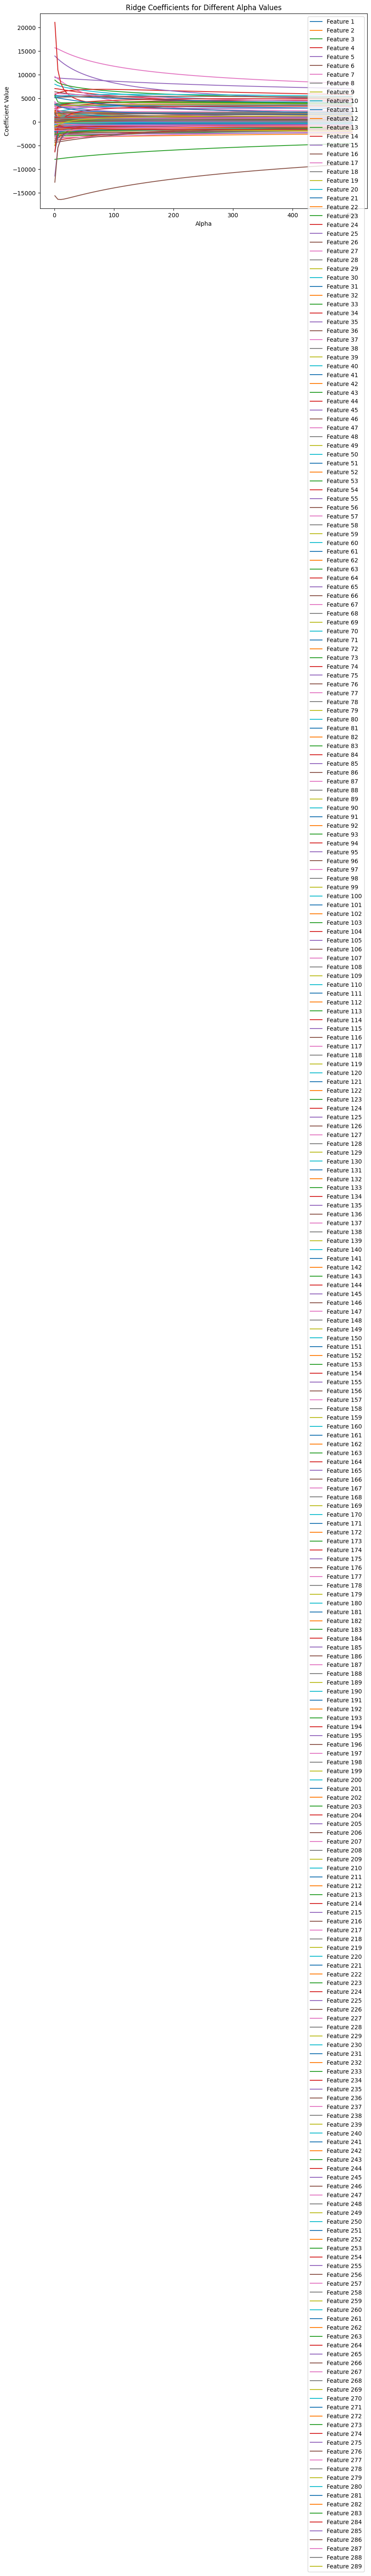

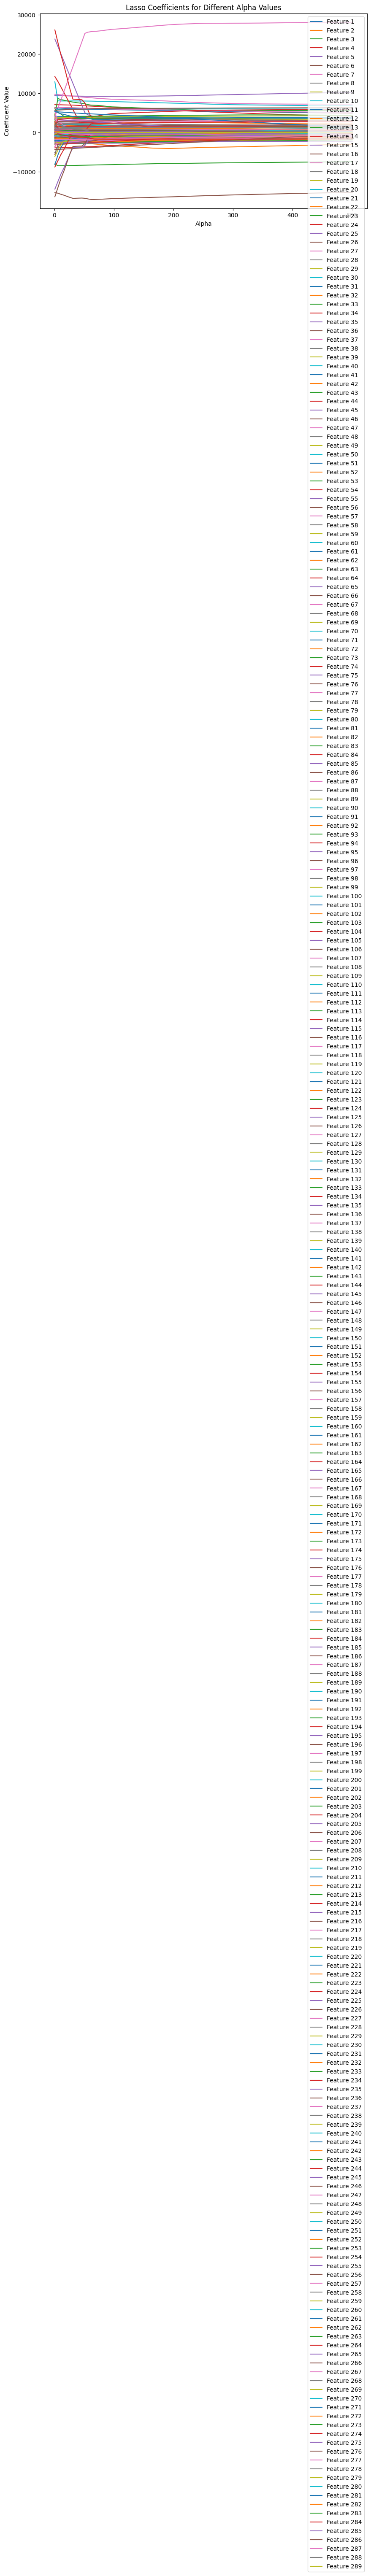

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

coefs_ridge = np.load('coefs_ridge.npy')
coefs_lasso = np.load('coefs_lasso.npy')
alphas = np.linspace(1, 500, 100)

plt.figure(figsize=(10, 6))
for i in range(coefs_ridge.shape[1]):
    plt.plot(alphas, coefs_ridge[:, i], label=f"Feature {i + 1}")
plt.xlabel('Alpha')
plt.ylabel('Coefficient Value')
plt.title('Ridge Coefficients for Different Alpha Values')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
for i in range(coefs_lasso.shape[1]):
    plt.plot(alphas, coefs_lasso[:, i], label=f"Feature {i + 1}")
plt.xlabel('Alpha')
plt.ylabel('Coefficient Value')
plt.title('Lasso Coefficients for Different Alpha Values')
plt.legend()
plt.show()


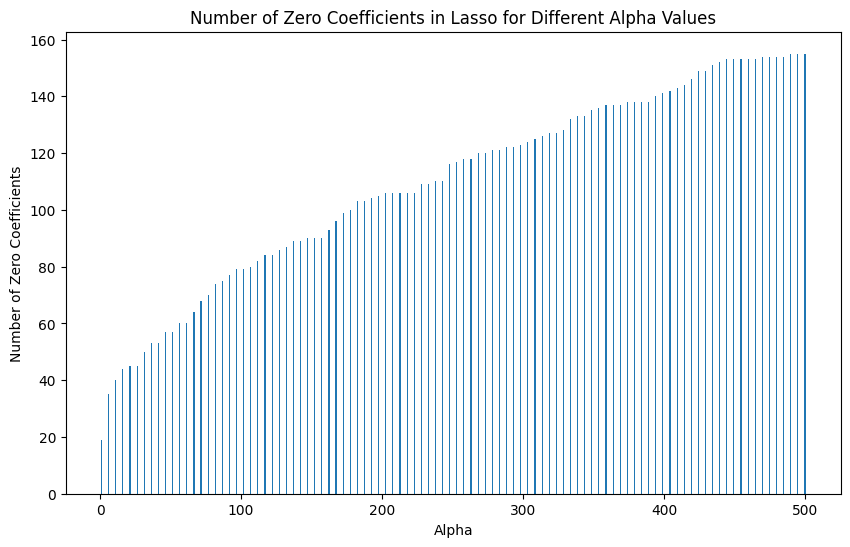

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

coefs_lasso = np.load('coefs_lasso.npy')
alphas = np.linspace(1, 500, 100)

zero_coefs_count = [np.sum(np.abs(coef) < 0.0001) for coef in coefs_lasso]

plt.figure(figsize=(10, 6))
plt.bar(alphas, zero_coefs_count)
plt.xlabel('Alpha')
plt.ylabel('Number of Zero Coefficients')
plt.title('Number of Zero Coefficients in Lasso for Different Alpha Values')
plt.show()


<function matplotlib.pyplot.title(label, fontdict=None, loc=None, pad=None, *, y=None, **kwargs)>

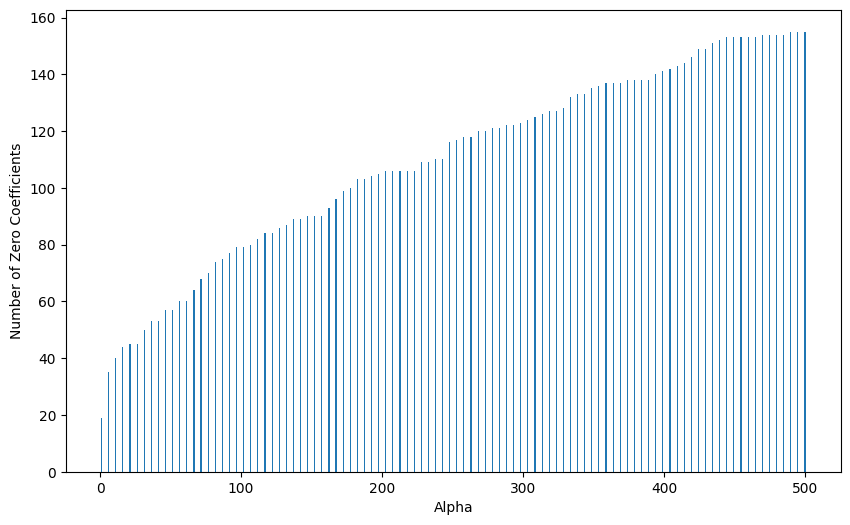

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

coefs_lasso = np.load('coefs_lasso.npy')
alphas = np.linspace(1, 500, 100)

zero_coefs_count = [np.sum(np.abs(coef) < 0.0001) for coef in coefs_lasso]

plt.figure(figsize=(10, 6))
plt.bar(alphas, zero_coefs_count)
plt.xlabel('Alpha')
plt.ylabel('Number of Zero Coefficients')
plt.title


## 1.7 Поиск оптимального alpha (6 баллов)

- С помощью метода LassoCV найдите оптимальное значение alpha и напечатайте его, используя разбиение на 5 фолда в кроссвалидации (`cv=5`).
- Нарисуйте график зависимости MSE от alpha (`mse_path_`).
- Нарисуйте длинную гистограмму магнитуда признаков, как в классе, на которой будет показано значение коэффициента для каждого признака. Графк должен быть остортирован по величине коэффициентов. Признаки с нулевыми коэффициентами должны быть удалены.
- Сколько в итоге ненулевых признаков осталось?
- Выведите **среднее** ошибки предсказания на 5 фолдах (cv=5) для этой линейной регрессии с помощью функции [sklearn.model_selection.cross_val_score](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html). Укажите `scoring='neg_mean_squared_error'`, чтобы считалась [MSE](http://scikit-learn.org/stable/modules/model_evaluation.html#mean-squared-error). Качество должно быть лучше, чем у простой линейной регрессии.

In [ ]:
import pandas as pd
from sklearn.linear_model import LassoCV
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('house_price.csv')

df = pd.get_dummies(df, columns=df.select_dtypes(include=['object']).columns)

X = df.drop('SalePrice', axis=1)
y = df['SalePrice']

X.fillna(X.mean(), inplace=True)

scaler = StandardScaler()
X = scaler.fit_transform(X)

lasso_cv = LassoCV(alphas=[0.1, 0.5, 1, 5, 10, 50, 100, 500], cv=5)

lasso_cv.fit(X, y)

print("Оптимальное значение alpha:", lasso_cv.alpha_)


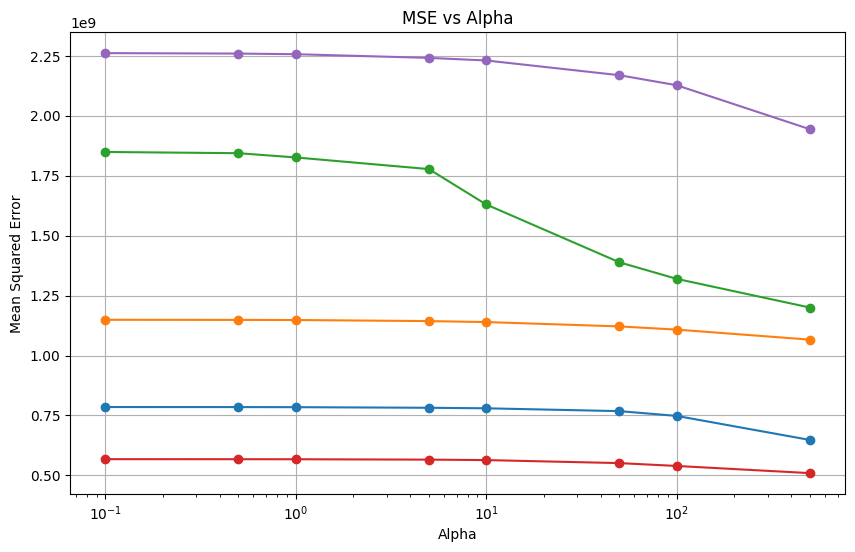

In [ ]:
import matplotlib.pyplot as plt

mse_path = lasso_cv.mse_path_
alphas = lasso_cv.alphas_
plt.figure(figsize=(10, 6))
plt.plot(alphas, mse_path, marker='o')
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Mean Squared Error')
plt.title('MSE vs Alpha')
plt.grid(True)
plt.show()


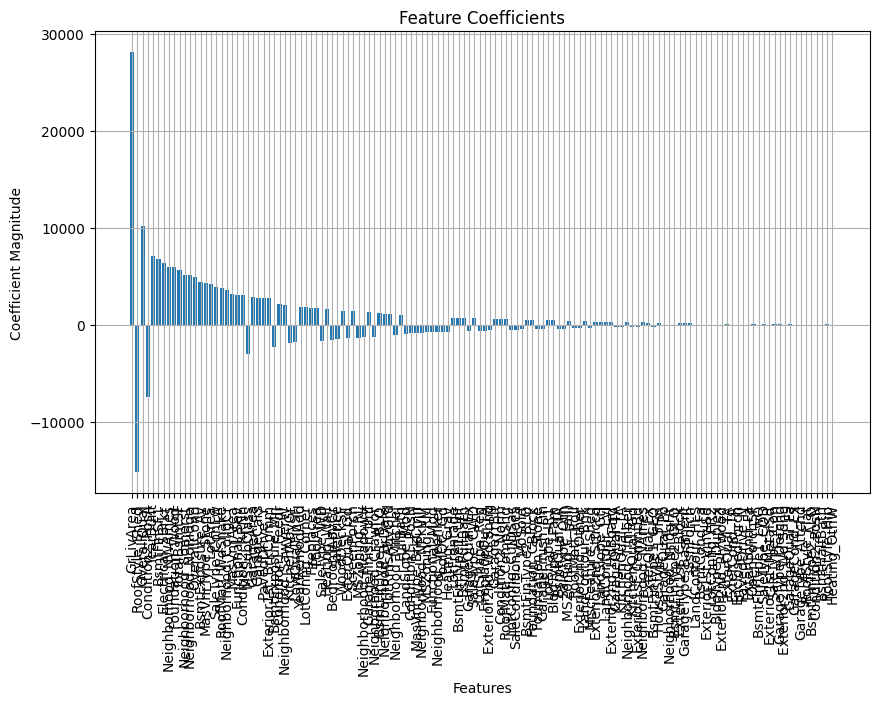

In [ ]:
coefs = lasso_cv.coef_
sorted_coefs = sorted(enumerate(coefs), key=lambda x: abs(x[1]), reverse=True)
top_features = [df.columns[i] for i, _ in sorted_coefs if abs(_)>0.0001]

plt.figure(figsize=(10, 6))
plt.bar(range(len(top_features)), [coefs[i] for i, _ in sorted_coefs if abs(_)>0.0001])
plt.xticks(range(len(top_features)), top_features, rotation=90)
plt.xlabel('Features')
plt.ylabel('Coefficient Magnitude')
plt.title('Feature Coefficients')
plt.grid(True)
plt.show()


In [ ]:
cross_val_scores = cross_val_score(lasso_cv, X, y, scoring='neg_mean_squared_error', cv=5)
mean_mse = -cross_val_scores.mean()
print("Среднее MSE на 5 фолдах:", mean_mse)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2787732416.4818115, tolerance: 599433295.0230061
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 654336883.1325684, tolerance: 599433295.0230061
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8006826653.043243, tolerance: 599433295.0230061
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:617: ConvergenceWa

Среднее MSE на 5 фолдах: 1073635709.6631901


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14732558873.811584, tolerance: 615578860.3559583
  model = cd_fast.enet_coordinate_descent_gram(


## 1.8 Предсказание на отложенной выборке (3 балла)

- Используя [sklearn.model_selection.train_test_split](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) разбейте датасет на 2 части - тренировочную и тестовую в соотношении 0.33. Не забудьте перемешать!
- Напечатайте размерность X_train и X_test

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

print("Размерность X_train:", X_train.shape)
print("Размерность X_test:", X_test.shape)


Размерность X_train: (978, 289)
Размерность X_test: (482, 289)


Теперь, возьмите вашу самую мощную модель(не тренированную!). Запустите её тренировку по тренировочной выборке X_train, y_train с помощью функции `fit`. Постройте предсказания с помощью функции `predict`.

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)


Визуализируйте scatter plot предсказанных значений и настоящих (`y_test`). У вас должен получиться график, точки которого расположены приблизительно вдоль некоторой прямой с разбросом. Идеальный предсказатель будет выглядить как набор точек вдоль прямой без разброса.

In [ ]:
import matplotlib.pyplot as plt

# Создайте scatter plot
plt.scatter(y_test, y_pred)

# Добавьте подписи к осям
plt.xlabel("Настоящие значения (y_test)")
plt.ylabel("Предсказанные значения (y_pred)")

# Добавьте заголовок
plt.title("Scatter Plot предсказанных и настоящих значений")

# Покажите график
plt.show()


## 1.9 Ограниченная версия ( 4 балла)

Помните в самом начале мы оставили очень мало признаков по данным из heatmap. Настало время проверить как он себя покажет! К счастью они все сразу числовые, а не категориальные. Переиспользуйте тот дадасет, где вы уже поборолись с пропусками.
Снова выделите отдельно X и y и запустите кроссвалидацию c 5 фолдами по Lasso с `alpha=1`.

In [ ]:
import pandas as pd

df = pd.read_csv('house_price.csv')



In [ ]:
categorical_features = df.select_dtypes(include='object').columns
df[categorical_features] = df[categorical_features].fillna('unknown')

numeric_features = df.select_dtypes(include=['float', 'int']).columns
df.loc[:, numeric_features] = df[numeric_features].fillna(df[numeric_features].mean())


In [ ]:
df = pd.get_dummies(df, drop_first=True)


In [ ]:
X = df.drop('SalePrice', axis=1)
y = df['SalePrice']


In [ ]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score

lasso = Lasso(alpha=1)

scores = cross_val_score(lasso, X, y, cv=5, scoring='neg_mean_squared_error')

print("Средняя ошибка предсказания (MSE):", -scores.mean())


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.456e+11, tolerance: 7.592e+08
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.209e+11, tolerance: 7.288e+08
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.058e+11, tolerance: 6.990e

Средняя ошибка предсказания (MSE): 2019556189.6846962


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.382e+11, tolerance: 7.249e+08
  model = cd_fast.enet_coordinate_descent(


In [71]:
import pandas as pd
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score

df = pd.read_csv('house_price.csv')

categorical_features = df.select_dtypes(include='object').columns
df[categorical_features] = df[categorical_features].fillna('unknown')

numeric_features = df.select_dtypes(include=['float', 'int']).columns
df.loc[:, numeric_features] = df[numeric_features].fillna(df[numeric_features].mean())

df = pd.get_dummies(df, drop_first=True)

X = df.drop('SalePrice', axis=1)
y = df['SalePrice']



lasso = Lasso(alpha=1)

scores = cross_val_score(lasso, X, y, cv=5, scoring='neg_mean_squared_error')

print("Средняя ошибка предсказания (MSE):", -scores.mean())



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.483e+11, tolerance: 7.592e+08
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.159e+11, tolerance: 7.288e+08
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.001e+11, tolerance: 6.990e

Средняя ошибка предсказания (MSE): 1891693017.835797


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.370e+11, tolerance: 7.249e+08
  model = cd_fast.enet_coordinate_descent(


Можете посмотреть еще много разных примеров обработки этого датасета тут: https://www.kaggle.com/c/house-prices-advanced-regression-techniques/kernels

А суть всего этого такова, что в итоге надо кучу времени потратить на подготовку признаков. Смотреть на кучу графиков а потом стакать модели.